# Self Organizing Maps

In [121]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [123]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [124]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

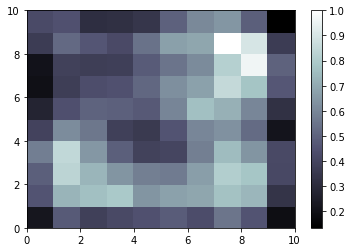

In [125]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

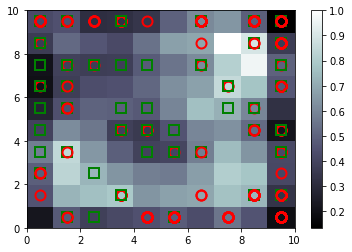

In [126]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [127]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,1)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15605791.0
15737627.0
15709459.0
15752139.0
15766906.0
15571415.0
15565714.0
15655464.0
15723989.0
15698271.0
15699340.0
15608688.0
15609070.0
15650313.0
15798895.0
15732884.0
15565996.0
15644400.0
15684440.0
15720353.0
15706637.0
15730673.0
15581871.0
15686670.0
15617065.0
15813363.0
15779492.0
15742297.0
15700549.0
15707042.0
15636626.0
15645571.0
15778589.0
15729377.0
15632275.0
15620103.0
15782089.0
15649101.0
15643574.0
15600027.0
15588019.0
15702030.0
15741633.0
15575146.0
15666297.0
15652667.0
15769980.0
15747757.0
15790113.0
15642448.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


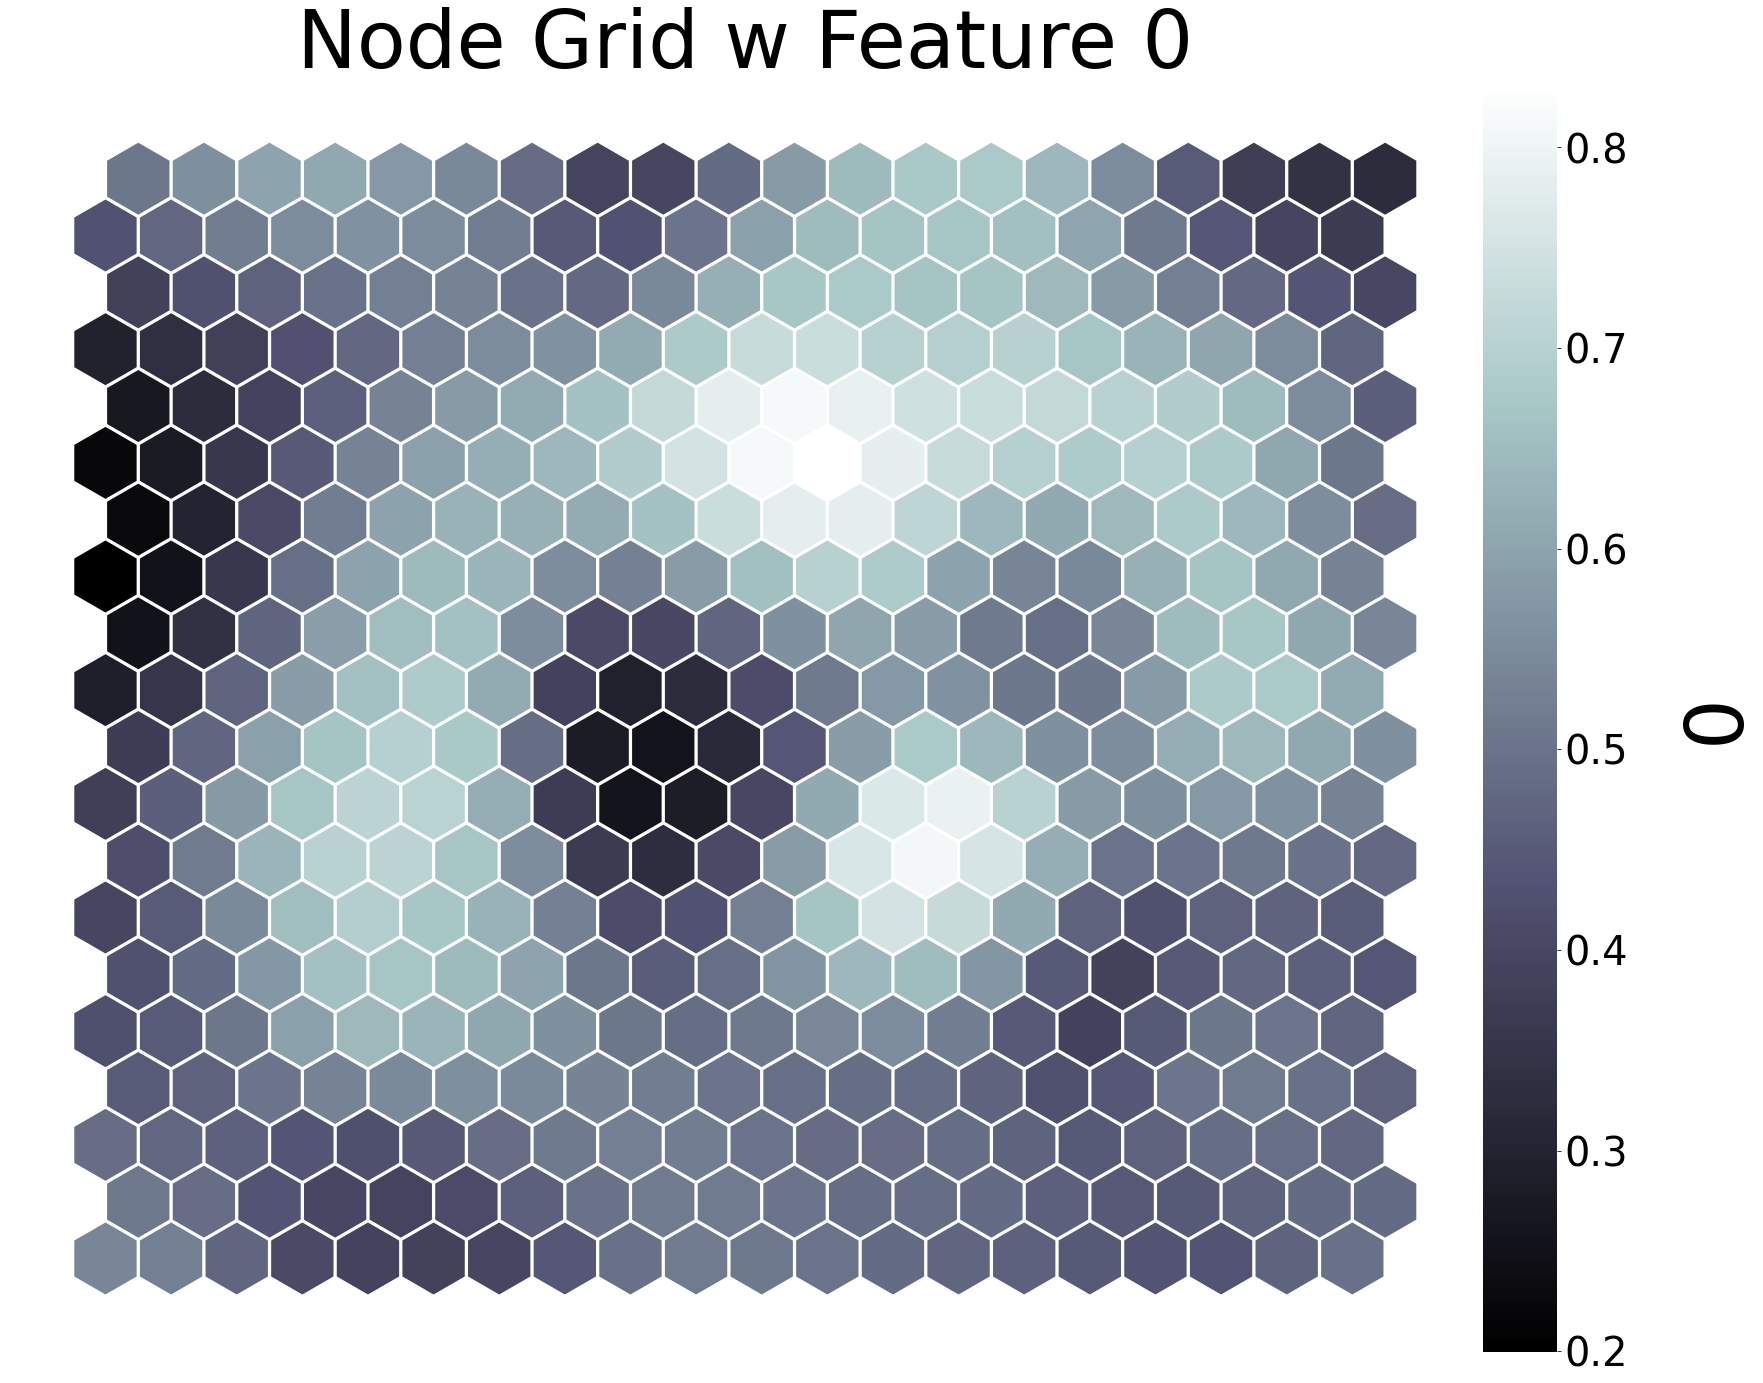

In [128]:
# ! pip install SimpSOM
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.SOMNet(20, 20, X, PBC=True)
net.train('batch', 10, 0.5)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

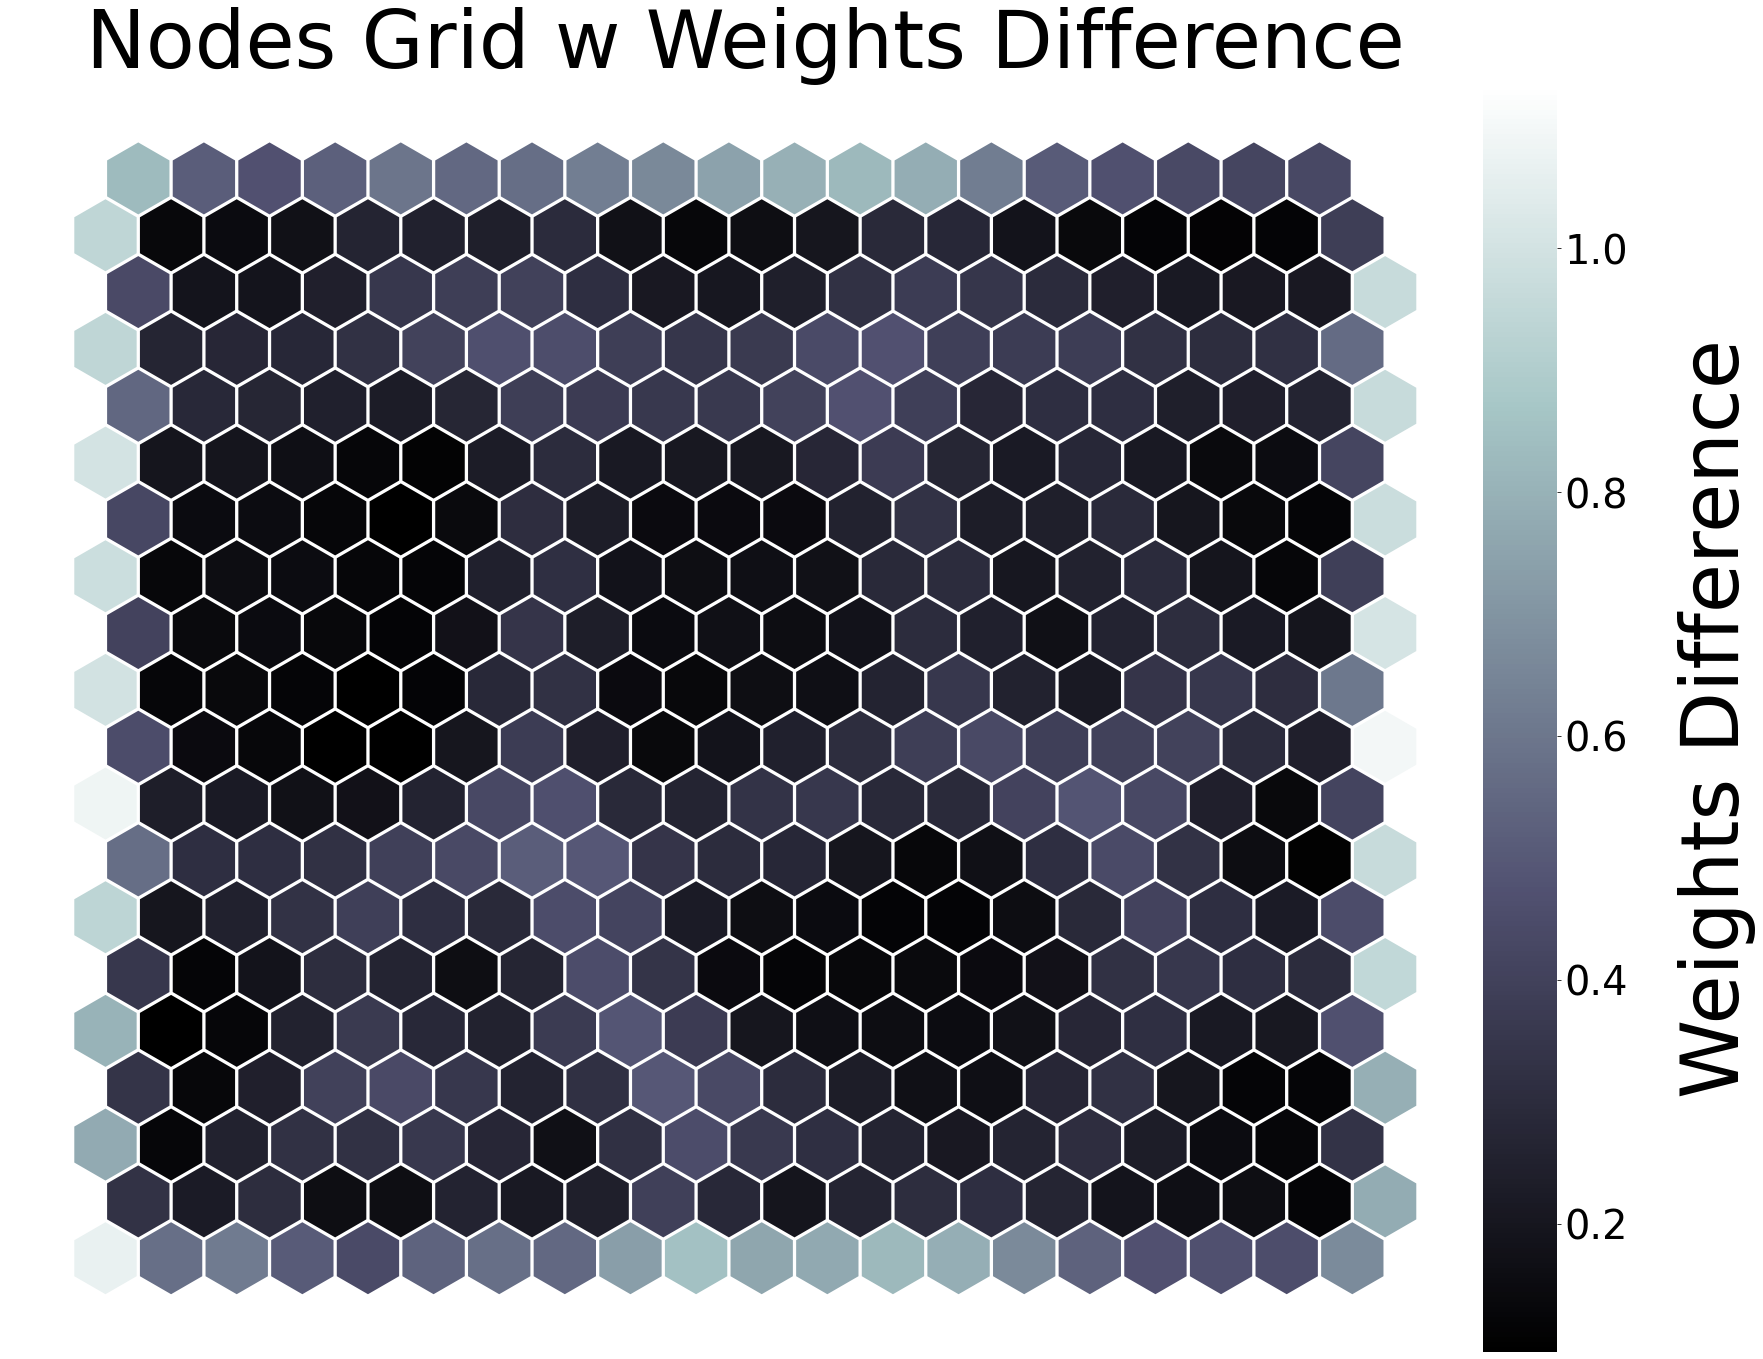

In [129]:
net.diff_graph()

In [130]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[0.0, 0.0],
 [1.5, 16.454482671904337],
 [4.0, 0.0],
 [19.5, 6.062177826491071],
 [15.5, 16.454482671904337],
 [19.5, 11.258330249197702],
 [4.5, 11.258330249197702],
 [19.5, 12.99038105676658],
 [0.5, 11.258330249197702],
 [19.5, 6.062177826491071],
 [15.5, 0.8660254037844388],
 [16.0, 0.0],
 [17.0, 0.0],
 [15.5, 0.8660254037844388],
 [1.5, 2.598076211353316],
 [5.0, 12.124355652982143],
 [19.5, 2.598076211353316],
 [17.0, 12.124355652982143],
 [5.0, 10.392304845413264],
 [17.5, 9.526279441628825],
 [1.5, 16.454482671904337],
 [10.0, 0.0],
 [5.0, 12.124355652982143],
 [8.0, 12.124355652982143],
 [2.0, 10.392304845413264],
 [15.5, 0.8660254037844388],
 [1.5, 11.258330249197702],
 [17.0, 0.0],
 [17.0, 12.124355652982143],
 [19.5, 2.598076211353316],
 [17.0, 0.0],
 [4.0, 0.0],
 [13.5, 2.598076211353316],
 [16.0, 0.0],
 [5.5, 4.330127018922194],
 [11.5, 16.454482671904337],
 [9.0, 5.196152422706632],
 [19.5, 2.598076211353316],
 [19.5, 7.794228634059948],
 [18.0, 5.196152422706632],
 [9.

<Figure size 432x288 with 0 Axes>

In [131]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X)	

[[0,
  1,
  2,
  4,
  7,
  10,
  11,
  12,
  13,
  14,
  16,
  20,
  25,
  27,
  29,
  30,
  31,
  33,
  37,
  41,
  43,
  46,
  48,
  50,
  53,
  55,
  56,
  57,
  59,
  60,
  63,
  65,
  66,
  69,
  73,
  74,
  76,
  80,
  82,
  84,
  86,
  88,
  90,
  93,
  94,
  96,
  100,
  103,
  106,
  109,
  111,
  112,
  114,
  115,
  117,
  118,
  119,
  120,
  121,
  122,
  129,
  131,
  133,
  135,
  137,
  138,
  141,
  142,
  143,
  145,
  146,
  147,
  149,
  155,
  158,
  161,
  162,
  163,
  165,
  166,
  167,
  176,
  177,
  178,
  182,
  185,
  188,
  190,
  191,
  201,
  205,
  212,
  213,
  214,
  219,
  222,
  228,
  236,
  237,
  238,
  241,
  242,
  247,
  248,
  250,
  251,
  252,
  255,
  256,
  258,
  259,
  262,
  264,
  267,
  268,
  269,
  270,
  274,
  275,
  278,
  279,
  280,
  283,
  284,
  285,
  286,
  289,
  292,
  293,
  298,
  300,
  301,
  302,
  305,
  306,
  312,
  318,
  320,
  322,
  324,
  325,
  326,
  327,
  329,
  334,
  335,
  340,
  343,
  344,
  351,
 

<Figure size 432x288 with 0 Axes>

Conclusão:

Após o cluster ser feito é possível ver no mapa gerado que existem várias divisões por cores. Essas divisões são dos grupos de dados que possuem características parecidas, e por terem caracterísitcas parecidas aparecem próximos dos seus semelhantes, porém é possível perceber que existem pontos próximos a outros com cores diferentes das suas, indicando algum tipo de irregularidade, podendo ser sinalizada como indício de fraude.